Original shape: (178, 13)
Reduced shape: (178, 2)
Explained variance ratio: [0.36198848 0.1920749 ]


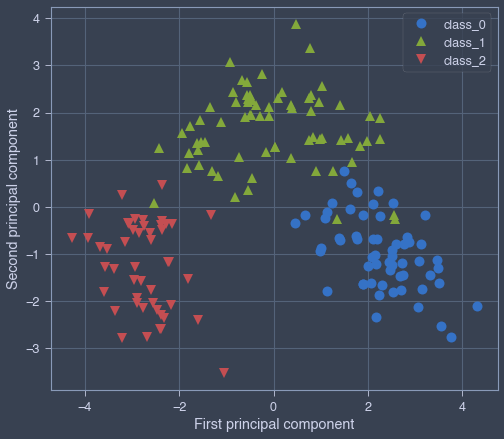

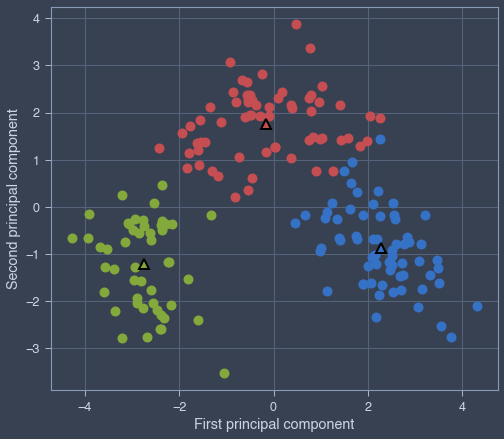

In [9]:
# The shape of wine data is 178*13
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler
import mglearn
import numpy as np

np.random.seed(0)

wine = load_wine()
scaler = StandardScaler() 
scaler.fit(wine.data)
X_scaled = scaler.transform(wine.data)

from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model to breast cancer data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], wine.target) 
plt.legend(wine.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

from sklearn.cluster import KMeans

# build the clustering model
pca_kmeans = KMeans(n_clusters=3, random_state=17, n_init=100) 
pca_kmeans.fit(X_pca)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], pca_kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

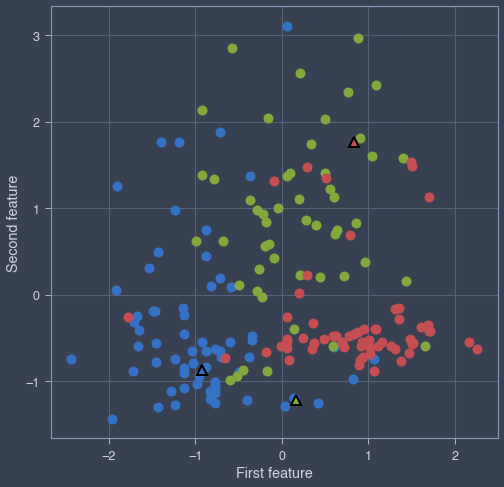

In [3]:
kmeans = KMeans(n_clusters=3, random_state = 17, n_init=100) 
kmeans.fit(X_scaled)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

In [4]:
from sklearn.metrics.cluster import fowlkes_mallows_score
from purity import purity_score

labels_true = wine.target
labels_pred = kmeans.labels_
pca_labels_pred = pca_kmeans.labels_

print(fowlkes_mallows_score(labels_true, labels_pred))
print(fowlkes_mallows_score(labels_true, pca_labels_pred))

0.9319080608075307
0.9303622792173031


In [5]:


print(purity_score(labels_true, labels_pred))
print(purity_score(labels_true, pca_labels_pred))

0.9662921348314607
0.9662921348314607


In [6]:
from sklearn.metrics.cluster import adjusted_rand_score

print(adjusted_rand_score(labels_true, labels_pred))
print(adjusted_rand_score(labels_true, pca_labels_pred))

0.8974949815093207
0.8950582389649661
